## 1. Importing the Necessary Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Changing the settings options for better display

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


#Fixing the seed value
np.random.seed(0)

In [3]:
# Loading the given dataset
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### 1.1 Data Checks

In [4]:
# Checking the number of rows and columns
df.shape

(9240, 37)

In [5]:
# Checking info on the columns and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


**`OBSERVATIONS:`**
- Can observe that Total Visits, Total Time Spent on Website, Page Views Per Visit has outliers on the basis of 75% value and max value.
- Can also observe count mismatches in some columns indicating Missing values.

### 1.2 Data Cleaning & Handling of Missing Values

In [7]:
# Dropping "Prospect ID" and "Lead Number" column as they won't provide any meaningful insights
lead_data = df.drop(['Prospect ID', 'Lead Number'], axis=1)

In [8]:
# Replacing Select category with Null value as it represents that the customer has not selected any of the options
lead_data = lead_data.replace("Select", np.NaN)

In [9]:
# Checking missing value percentages for each column
missing_perc = round((lead_data.isnull().sum()/len(lead_data))*100,2)
missing_perc

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [10]:
# Dropping columns having missing values more than around 40% since those columns will not provide significant insights for analysis
lead_data = lead_data.loc[:,missing_perc<39]

In [11]:
# Checking missing value percentages for each column again
missing_perc = round((lead_data.isnull().sum()/len(lead_data))*100,2)
missing_perc

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [12]:
# Dropping Tags column, as it is assigned to a Lead by the company employee after contacting them. 
# Model is built for finding Potential Leads to be contacted. 

lead_data.drop('Tags', axis=1, inplace=True)

In [13]:
# Imputing TotalVisits, Page Views Per Visit columns with median value, as it has only 1% missing values

lead_data['TotalVisits'] = lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median())
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].median())

In [14]:
# Inspecting each categorical column

for col in lead_data.select_dtypes(exclude=['int64','float64']).columns:
    print(col, "\n", lead_data[col].value_counts(normalize=True, dropna=False), "\n")

Lead Origin 
 Landing Page Submission   0.53
API                       0.39
Lead Add Form             0.08
Lead Import               0.01
Quick Add Form            0.00
Name: Lead Origin, dtype: float64 

Lead Source 
 Google              0.31
Direct Traffic      0.28
Olark Chat          0.19
Organic Search      0.12
Reference           0.06
Welingak Website    0.02
Referral Sites      0.01
Facebook            0.01
NaN                 0.00
bing                0.00
google              0.00
Click2call          0.00
Live Chat           0.00
Press_Release       0.00
Social Media        0.00
WeLearn             0.00
NC_EDM              0.00
testone             0.00
Pay per Click Ads   0.00
youtubechannel      0.00
welearnblog_Home    0.00
blog                0.00
Name: Lead Source, dtype: float64 

Do Not Email 
 No    0.92
Yes   0.08
Name: Do Not Email, dtype: float64 

Do Not Call 
 No    1.00
Yes   0.00
Name: Do Not Call, dtype: float64 

Last Activity 
 Email Opened                   0.

In [15]:
# Imputing 'Last Activity', 'Lead Source' columns with mode value, as it has only 1% missing values

lead_data['Lead Source'] = lead_data['Lead Source'].fillna(lead_data['Lead Source'].mode()[0])
lead_data['Last Activity'] = lead_data['Last Activity'].fillna(lead_data['Last Activity'].mode()[0])

In [16]:
# Imputing 'Country', 'What matters most to you in choosing a course' columns with mode value, 
# as the highest category is 70%

lead_data['Country'] = lead_data['Country'].fillna(lead_data['Country'].mode()[0])
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna(lead_data['What matters most to you in choosing a course'].mode()[0])

In [17]:
# Imputing missing values in Specialization, What is your current occupation columns as Unknown category 
# since around 30% of the values are missing but column seems important

lead_data['Specialization'] = lead_data['Specialization'].replace(np.NaN, 'Unknown')
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.NaN, 'Unknown')

### 1.3 Handling Columns with Class Imbalance

In [18]:
# Dropping columns that has very high class imbalance i.e., one category represents more than 90% of the entire data.

cols = ['Do Not Call', 'Do Not Email','Country','What matters most to you in choosing a course','Search','Magazine',
        'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
        'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
        'I agree to pay the amount through cheque']

lead_data.drop(cols, axis=1, inplace=True)
lead_data.shape

(9240, 11)

In [19]:
# Checking missing value percentages for each column again
missing_perc = (lead_data.isnull().sum()/len(lead_data))*100
missing_perc

Lead Origin                              0.00
Lead Source                              0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
Specialization                           0.00
What is your current occupation          0.00
A free copy of Mastering The Interview   0.00
Last Notable Activity                    0.00
dtype: float64

### 1.4 Handling Categorical Columns with High Variance but Low Representation

In [20]:
# Inspecting each categorical column again

for col in lead_data.select_dtypes(exclude=['int64','float64']).columns:
    print(col, "\n", lead_data[col].value_counts(normalize=True, dropna=False), "\n")

Lead Origin 
 Landing Page Submission   0.53
API                       0.39
Lead Add Form             0.08
Lead Import               0.01
Quick Add Form            0.00
Name: Lead Origin, dtype: float64 

Lead Source 
 Google              0.31
Direct Traffic      0.28
Olark Chat          0.19
Organic Search      0.12
Reference           0.06
Welingak Website    0.02
Referral Sites      0.01
Facebook            0.01
bing                0.00
google              0.00
Click2call          0.00
Social Media        0.00
Press_Release       0.00
Live Chat           0.00
NC_EDM              0.00
testone             0.00
Pay per Click Ads   0.00
youtubechannel      0.00
welearnblog_Home    0.00
blog                0.00
WeLearn             0.00
Name: Lead Source, dtype: float64 

Last Activity 
 Email Opened                   0.38
SMS Sent                       0.30
Olark Chat Conversation        0.11
Page Visited on Website        0.07
Converted to Lead              0.05
Email Bounced           

In [21]:
# Combining Add Forms/Import categories as there are very few records of them in Lead Origin column

lead_data['Lead Origin'] = lead_data['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form'], 'Add Forms/Imports')

In [22]:
# Sanity check - replacing google with Google in the Lead Source column as both are same category

lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')

In [23]:
# Combining various source categories as there are very few records of them in Lead Source column

lead_data['Lead Source'] = lead_data['Lead Source'].map(lambda x: x if x in ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference', 'Welingak Website', 'Referral Sites', 'Facebook'] 
                             else 'Other Sources')

In [24]:
# Combining various last activity categories as there are very few records of them in Last Activity column

lead_data['Last Activity'] = lead_data['Last Activity'].map(lambda x: x if x in ['Email Opened', 'SMS Sent', 
                                                                                 'Olark Chat Conversation', 
                                                                                 'Page Visited on Website',
                                                                                 'Converted to Lead', 'Email Bounced',
                                                                                 'Email Link Clicked', 'Form Submitted on Website',
                                                                                 'Unreachable', 'Unsubscribed'] 
                                                            else 'Other Activities')

In [25]:
# Combining similar Specialization categories in Specialization column

lead_data['Specialization'] = lead_data['Specialization'].map(lambda x:'Management' if 'Management' in x else x)
lead_data['Specialization'] = lead_data['Specialization'].map(lambda x:'Business' if 'Business' in x else x)
lead_data['Specialization'] = lead_data['Specialization'].replace(['Rural and Agribusiness', 'E-COMMERCE'], 'Business')
lead_data['Specialization'] = lead_data['Specialization'].map(lambda x: x if x in ['Management', 'Business', 'Unknown'] 
                                                              else 'Others')

In [26]:
# Combining various occuptaion categories as there are very few records of them in What is your current occupation column

lead_data['What is your current occupation'] = lead_data['What is your current occupation'].map(lambda x: x if x in ['Unemployed','Working Professional','Student','Unknown'] else 'Other')

In [27]:
# Combining various last notable activity categories as there are very few records of them in Last Notable Activity column

lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].map(lambda x: x if x in ['Modified', 'Email Opened', 
                                                                                                 'SMS Sent',
                                                                                                'Olark Chat Conversation', 
                                                                                                'Page Visited on Website',
                                                                                                'Email Link Clicked'] 
                                                                            else 'Other Activities')

In [28]:
# Inspecting each categorical column again

for col in lead_data.select_dtypes(exclude=['int64','float64']).columns:
    print(col, "\n", lead_data[col].value_counts(normalize=True, dropna=False), "\n")

Lead Origin 
 Landing Page Submission   0.53
API                       0.39
Add Forms/Imports         0.08
Name: Lead Origin, dtype: float64 

Lead Source 
 Google             0.31
Direct Traffic     0.28
Olark Chat         0.19
Organic Search     0.12
Reference          0.06
Welingak Website   0.02
Referral Sites     0.01
Facebook           0.01
Other Sources      0.00
Name: Lead Source, dtype: float64 

Last Activity 
 Email Opened                0.38
SMS Sent                    0.30
Olark Chat Conversation     0.11
Page Visited on Website     0.07
Converted to Lead           0.05
Email Bounced               0.04
Email Link Clicked          0.03
Form Submitted on Website   0.01
Unreachable                 0.01
Unsubscribed                0.01
Other Activities            0.01
Name: Last Activity, dtype: float64 

Specialization 
 Management   0.46
Unknown      0.37
Business     0.09
Others       0.08
Name: Specialization, dtype: float64 

What is your current occupation 
 Unemployed  

### 1.5 Outlier Analysis

In [29]:
# Checking the summary for the numeric columns 

round(lead_data.describe(percentiles=[0.25,0.50,0.75,0.85,0.95]),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.44,487.70,2.36
std,0.49,4.82,548.02,2.15
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,12.00,1.00
50%,0.00,3.00,248.00,2.00
75%,1.00,5.00,936.00,3.00
85%,1.00,6.00,1233.15,4.00
95%,1.00,10.00,1562.00,6.00
max,1.00,251.00,2272.00,55.00


**`OBSERVATIONS:`**
- Can observe that Total Visits, Page Views Per Visit has outliers on the basis of 95% value and max value.

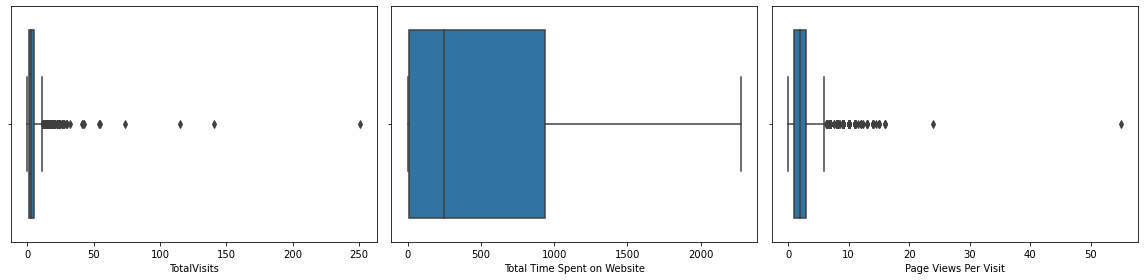

In [30]:
#Plotting 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' columns

cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(16,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=lead_data[cols[i]],data=lead_data)
plt.tight_layout()
plt.show()

In [31]:
# Dropping outliers in TotalVisits and Page Views Per Visit columns, as there are only few records (TotalVisits > 100) and 
# (Page Views Per Visit > 20)


lead_data = lead_data[(lead_data['TotalVisits'] <= 50) & (lead_data['Page Views Per Visit'] <=20)]

In [32]:
# Checking data shape again
lead_data.shape

(9233, 11)

In [33]:
#Cleaned Dataframe
lead_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Unknown,Unemployed,No,Modified
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Unknown,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Others,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Unknown,Unemployed,No,Modified


## 2. EDA

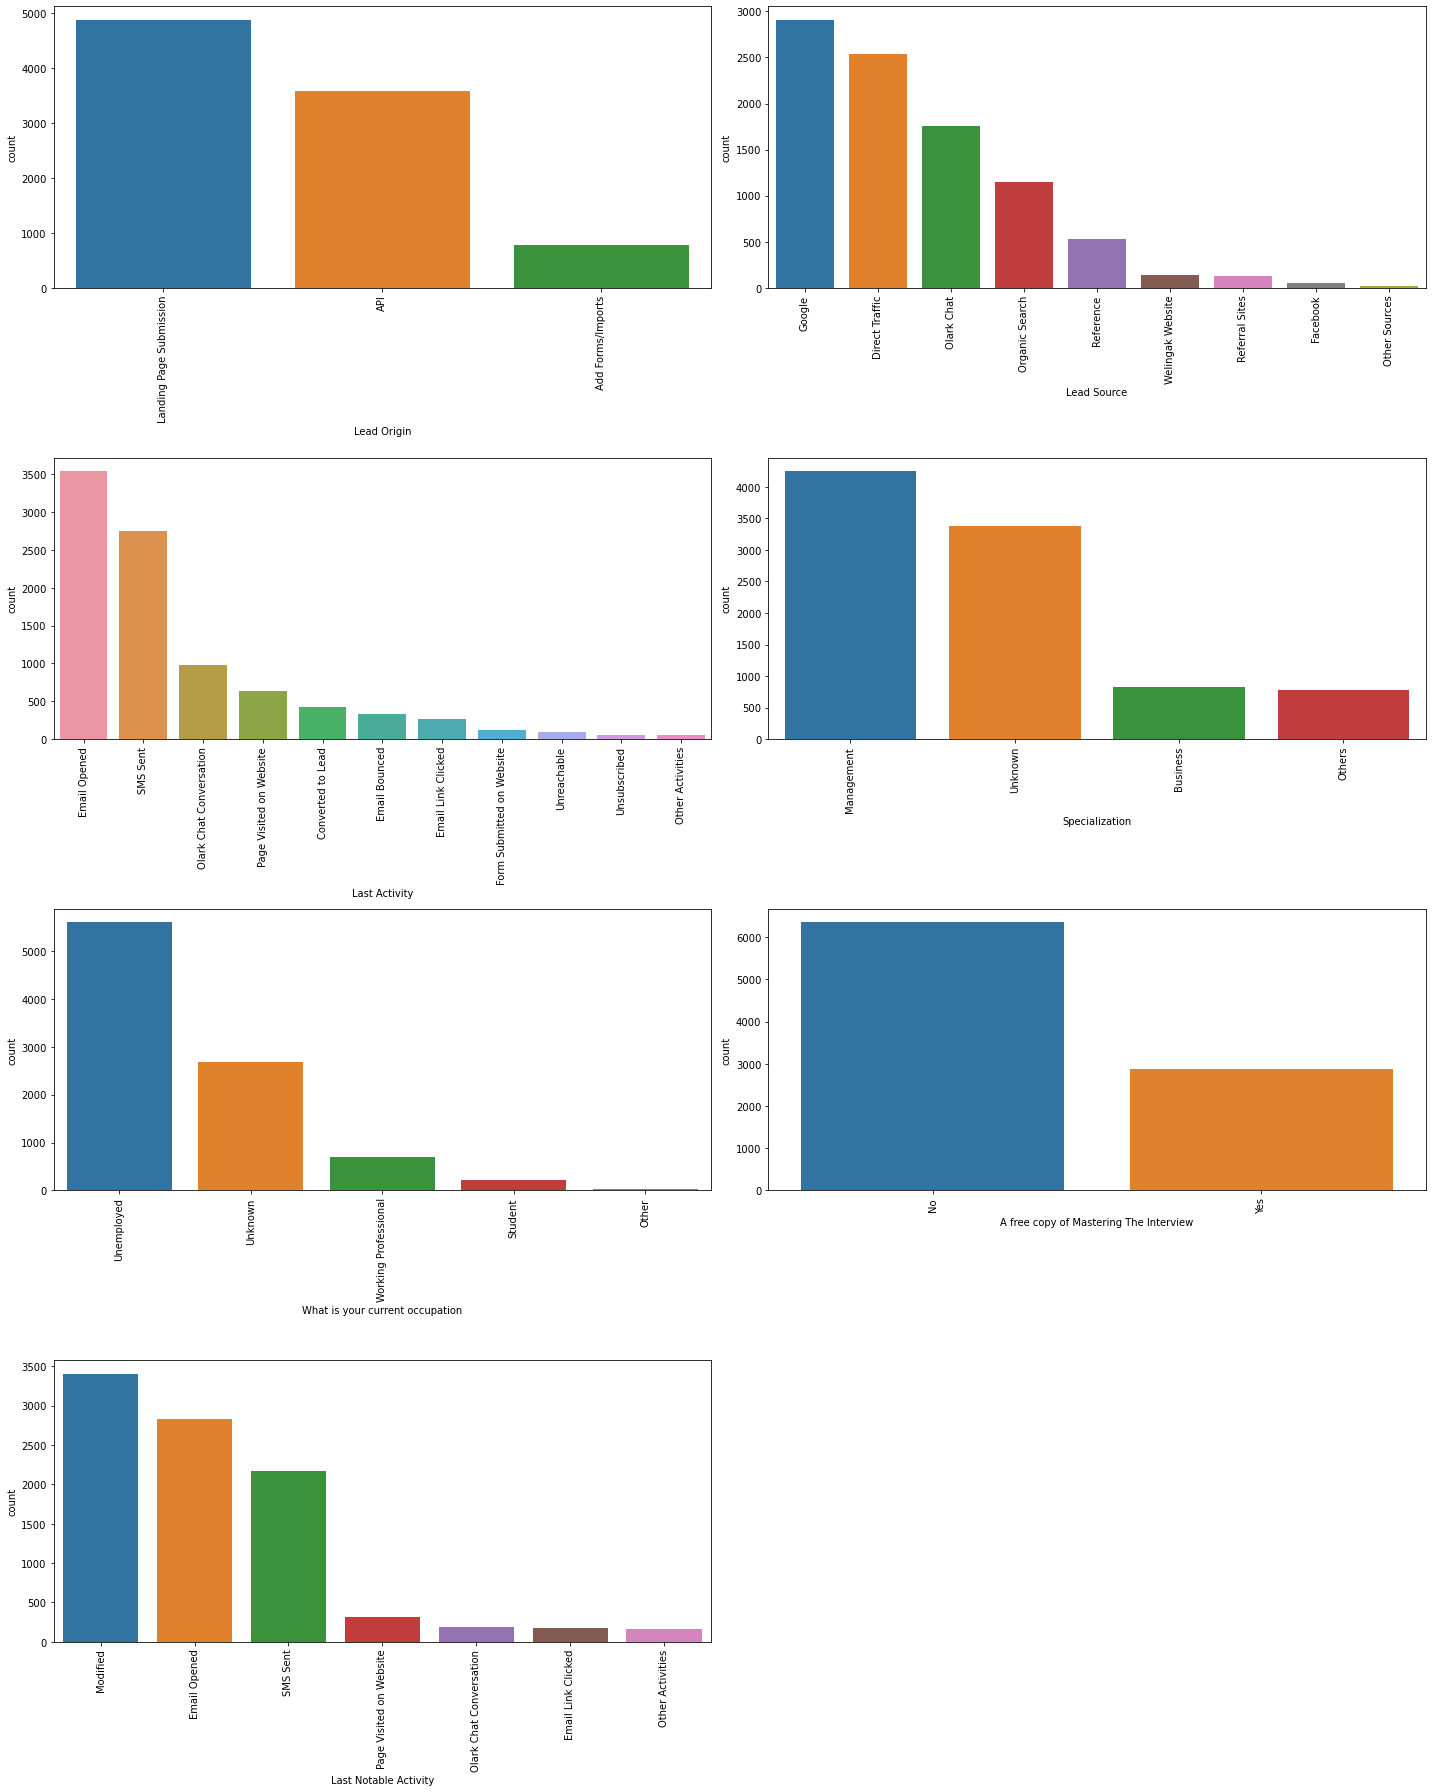

In [34]:
# Plotting the categorical variable distribution using countplot
plt.figure(figsize = [20,25])
for i in enumerate(lead_data.select_dtypes(exclude=['int64','float64']).columns):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(x=i[1], data=lead_data, order=lead_data[i[1]].value_counts().index)
    plt.xticks(rotation=90)
    plt.tight_layout()

**`OBSERVATIONS:`**
- Most of the Leads' origin is from Landing Page submission, and from the sources Google and through Direct Traffic.
- Most of the Leads' Last Activity is Email Opened or SMS sent, and Last Notable Activity is Modified.
- Many leads are Specialized in Management related Roles.
- Around 80% of the leads are Unemployed.
- Most customers have opted for 'No' indicating they do not want to receive a free copy of Mastering The Interview.

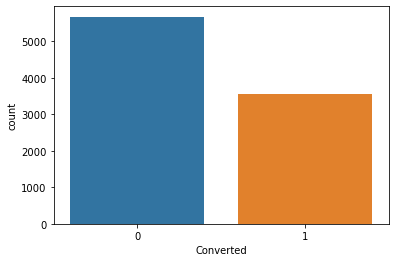

In [35]:
#Plotting the target variable
sns.countplot(data=lead_data, x='Converted')
plt.show()

In [36]:
lead_data.Converted.value_counts(normalize=True)

0   0.61
1   0.39
Name: Converted, dtype: float64

**`OBSERVATIONS:`**
- There is 39% conversion rate of Leads in the dataset

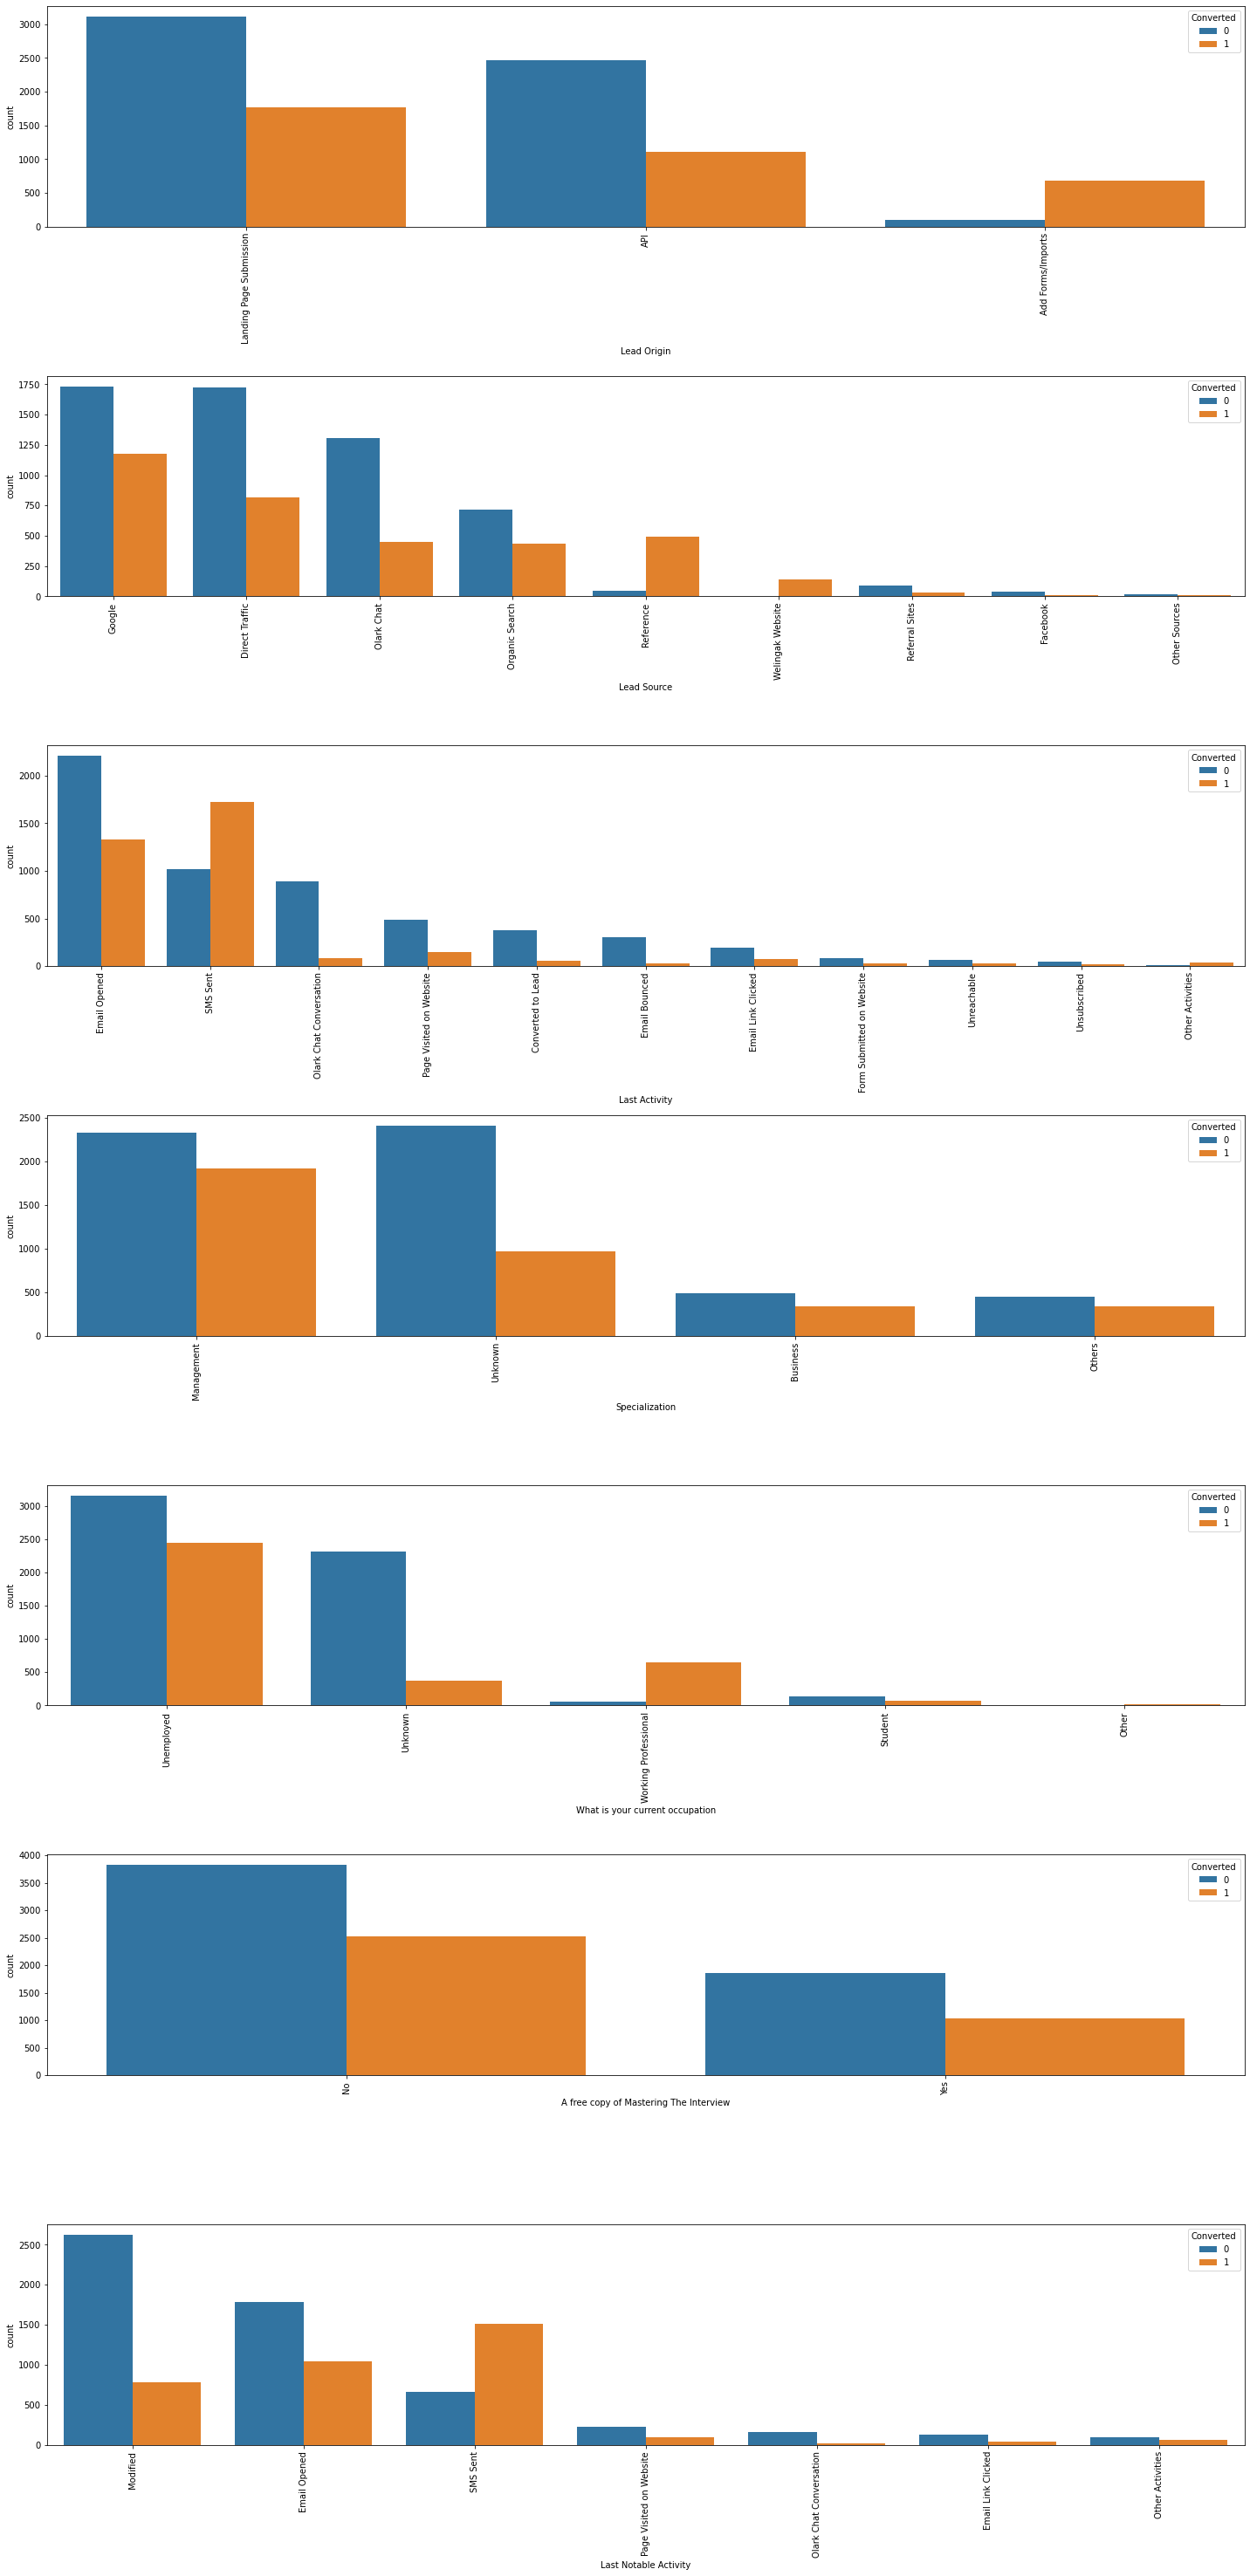

In [37]:
# Plotting the categorical variable distribution w.r.t to Converted column (target variable) using countplot
plt.figure(figsize = [20,45])
for i in enumerate(lead_data.select_dtypes(exclude=['int64','float64']).columns):
    plt.subplot(8,1,i[0]+1)
    sns.countplot(x=i[1], data=lead_data, order=lead_data[i[1]].value_counts().index, hue='Converted')
    plt.xticks(rotation=90)
    plt.tight_layout()

**`OBSERVATIONS:`**
- There are good amount of conversions from all categories of the Lead Origin and Lead Source columns
- Email Opened and SMS Sent have the most conversions in Last Activity and Last Notable Activity
- Management has the most conversions in the Specialization column
- Unemployed has the most conversions followed by Working Professionals in the What is your current occupation column.

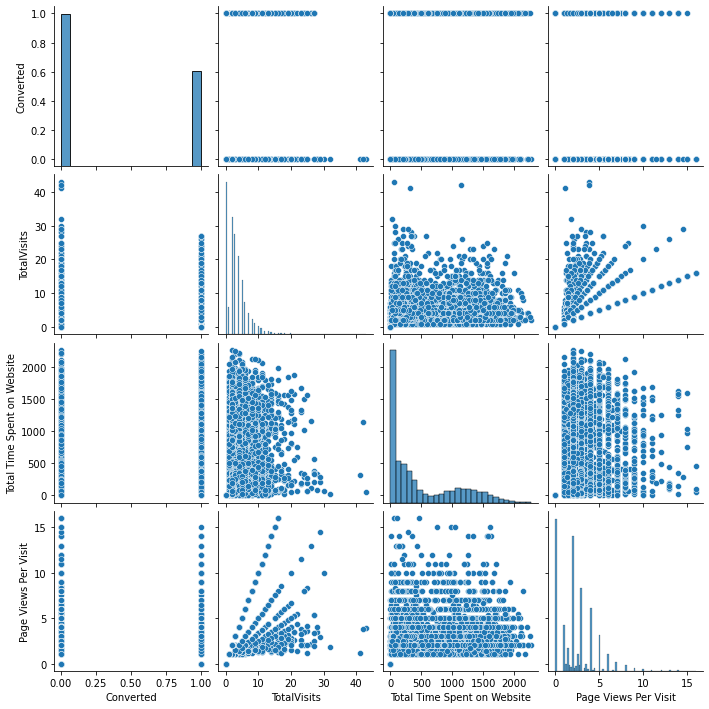

In [38]:
#Plotting Numerical Variables to check their distribution and correalations
sns.pairplot(lead_data)
plt.show()

**`OBSERVATIONS:`**
- There seems to be a linear relationship between TotalVisits and Page Views Per Visit columns

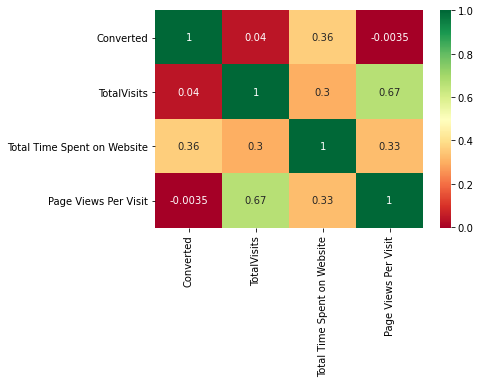

In [39]:
# Plotting Heatmaps
sns.heatmap(lead_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [40]:
# Since TotalVisits and Page Views Per Visit have good correlation, dropping Page Views Per Visit column.

lead_data.drop('Page Views Per Visit', axis=1, inplace=True)

## 3. Data Transformation for Model Building

In [41]:
lead_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.00,0,Page Visited on Website,Unknown,Unemployed,No,Modified
1,API,Organic Search,0,5.00,674,Email Opened,Unknown,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.00,1532,Email Opened,Business,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.00,305,Unreachable,Others,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.00,1428,Converted to Lead,Unknown,Unemployed,No,Modified


In [42]:
# Mapping columns from Yes/No to 1/0:

lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].map(lambda x: 1 if x=='Yes' else 0)

In [43]:
#Checking categorical columns
lead_data.select_dtypes(exclude=['int64','float64']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

### 3.1 Dummy variables Creation

In [44]:
# Creating dummy variables for all categorical columns

lead_data = pd.get_dummies(data=lead_data, columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                                    'What is your current occupation', 'Last Notable Activity'],
                           drop_first=True)

In [45]:
lead_data.shape

(9233, 37)

In [46]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Add Forms/Imports,Lead Origin_Landing Page Submission,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Management,Specialization_Others,Specialization_Unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,0,5.00,674,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
2,1,2.00,1532,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,1.00,305,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,1,2.00,1428,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


<AxesSubplot:>

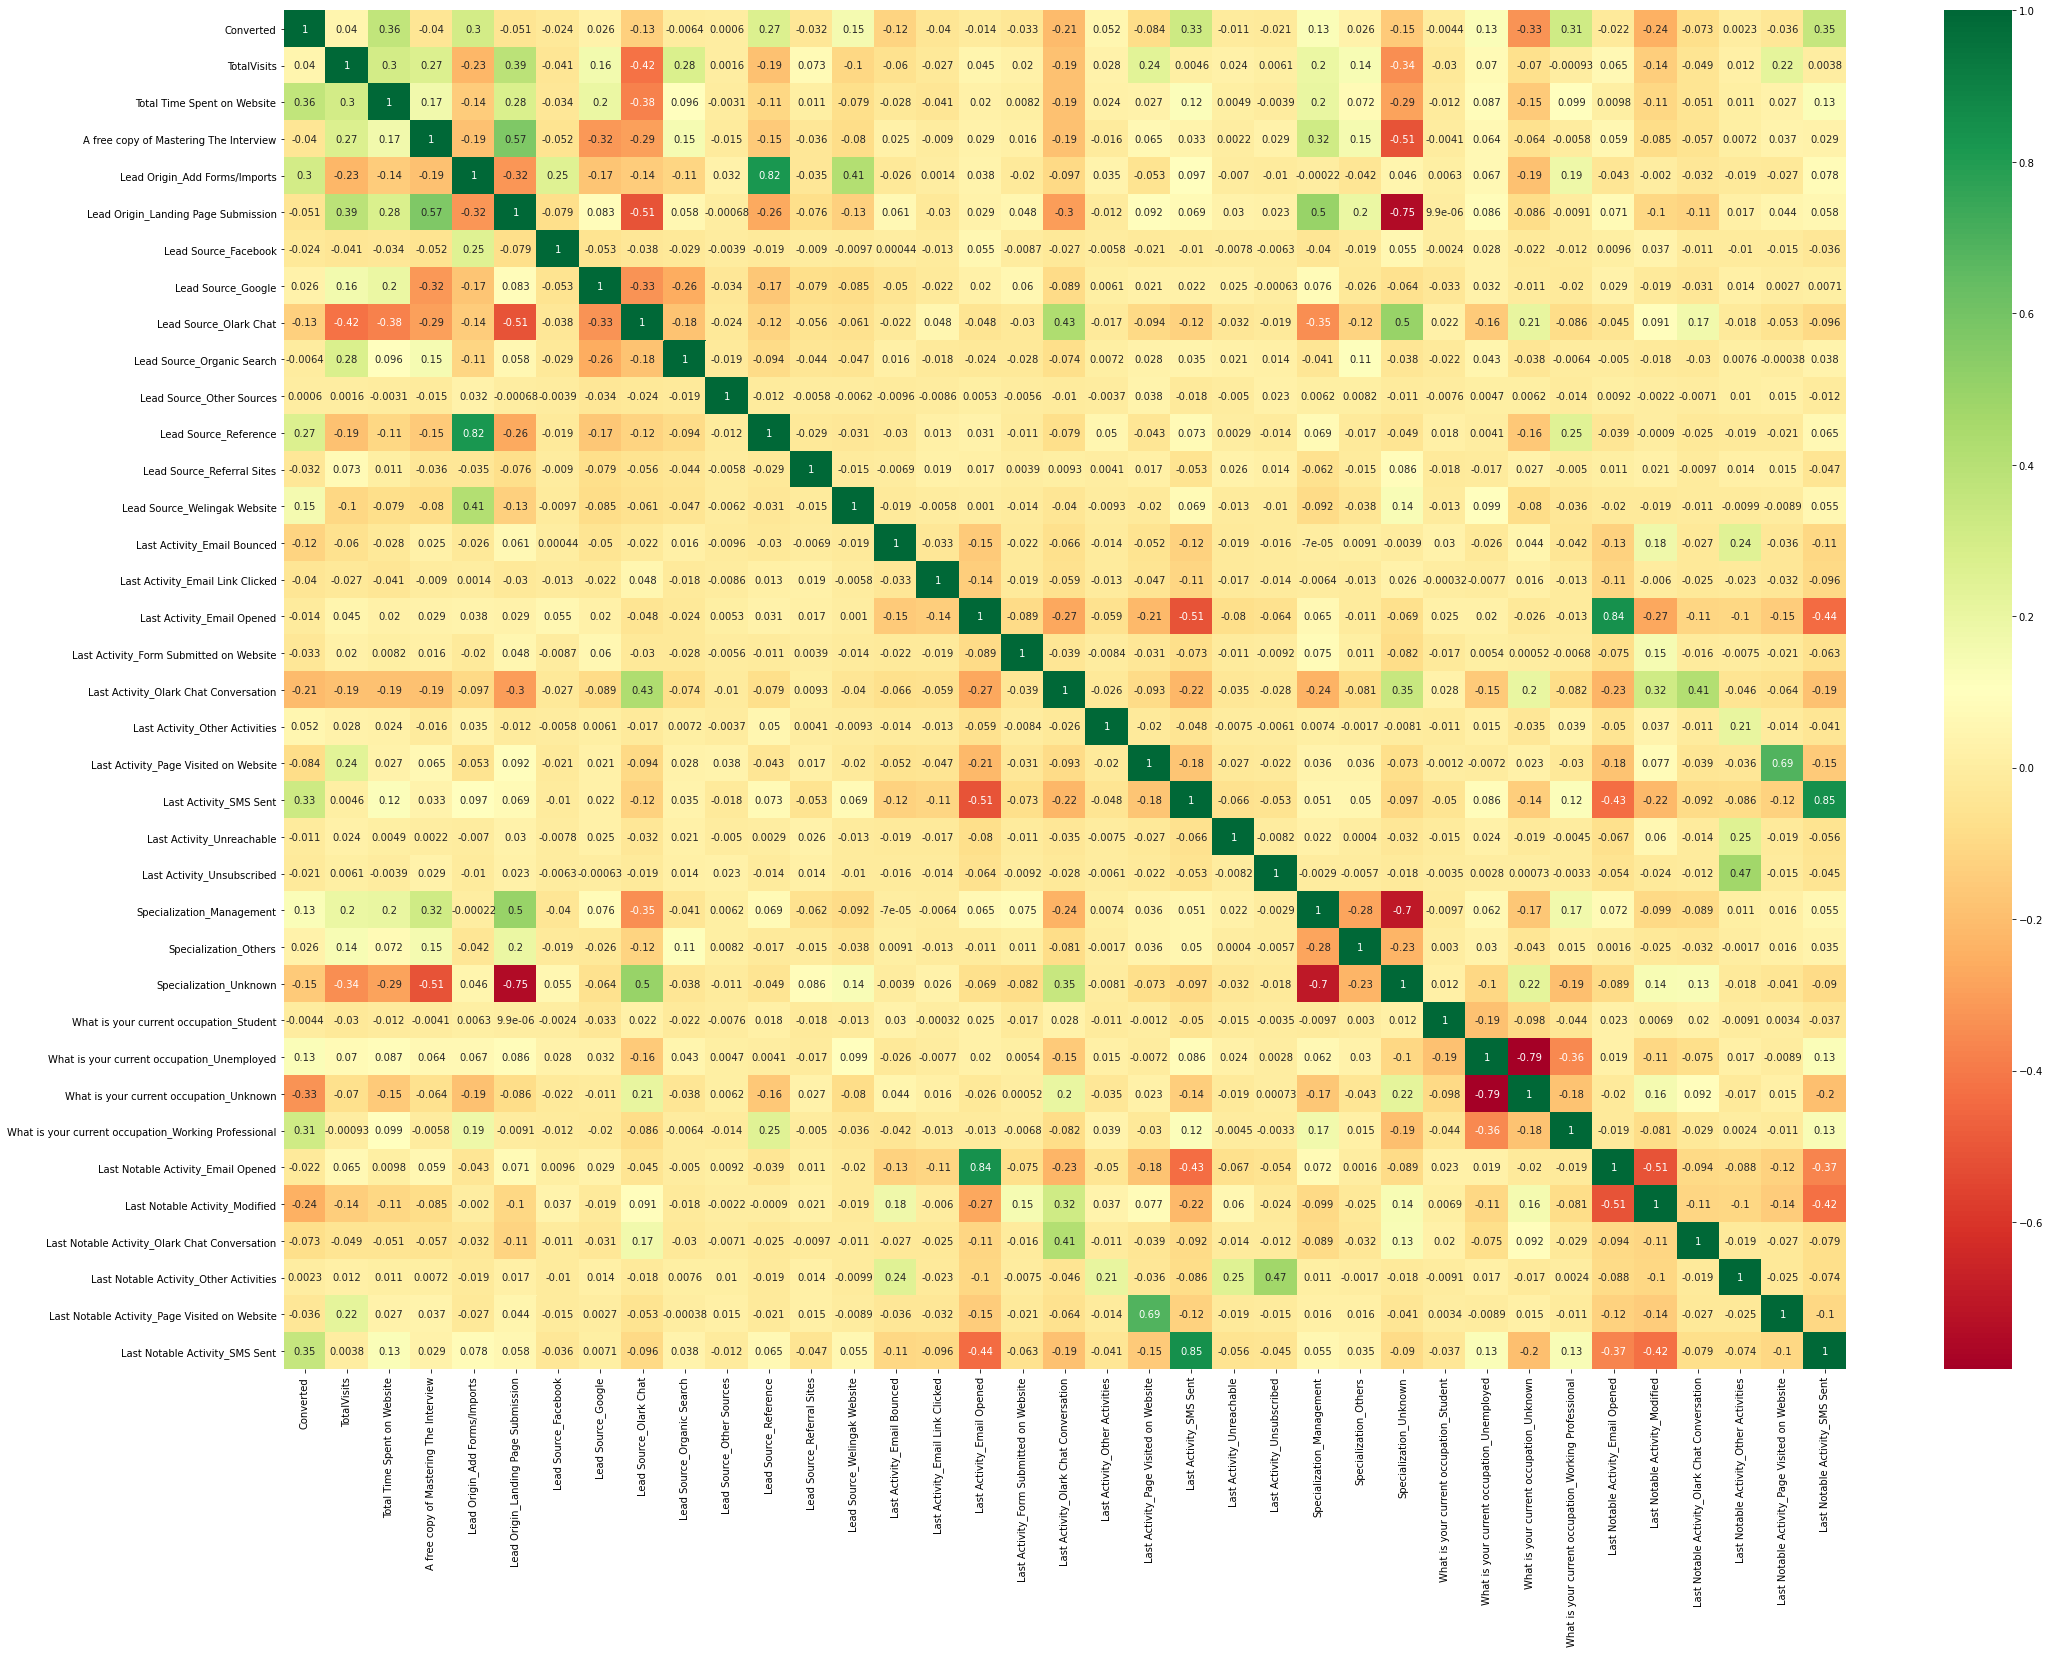

In [47]:
# Checking correlations between all columns

plt.figure(figsize=[35,25])
sns.heatmap(lead_data.corr(), annot=True, cmap='RdYlGn')

**`OBSERVATIONS:`**

- The features Total Time Spent of Website, Lead Origin Add Forms / Imports, Lead Source Olark Chat, Lead Source Reference, Lead Source Welingak Website, Last Activity Email Bounced, Last Activity Olark Chat Conversation, Last Activity SMS Sent, Specialization_Unknown, What is your current occupation_Unknown, What is your current occupation Working Professional, Last Notable Activity_SMS Sent, Last Notable Activity_Modified have a linear relationship with CONVERTED target variable.
- The features were selected in such a way that the linear correlation between them was not more than 0.5


### 3.2 Train and Test Data Splitting

In [48]:
## Assigning target variable - 'Converted' to y
y=lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
## assigning all dependent variables to x
X=lead_data.drop('Converted',axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Add Forms/Imports,Lead Origin_Landing Page Submission,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Management,Specialization_Others,Specialization_Unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,5.00,674,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
2,2.00,1532,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1.00,305,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,2.00,1428,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [50]:
## Splitting the data set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 3.3 Feature Scaling

In [51]:
scalar = MinMaxScaler()

cols = ['TotalVisits', 'Total Time Spent on Website']
X_train[cols] = scalar.fit_transform(X_train[cols])

In [52]:
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Add Forms/Imports,Lead Origin_Landing Page Submission,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Management,Specialization_Others,Specialization_Unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1032,0.14,0.61,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
6535,0.12,0.20,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
6238,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3190,0.09,0.70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
712,0.02,0.07,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


### 3.4 Correlation Checks

<AxesSubplot:>

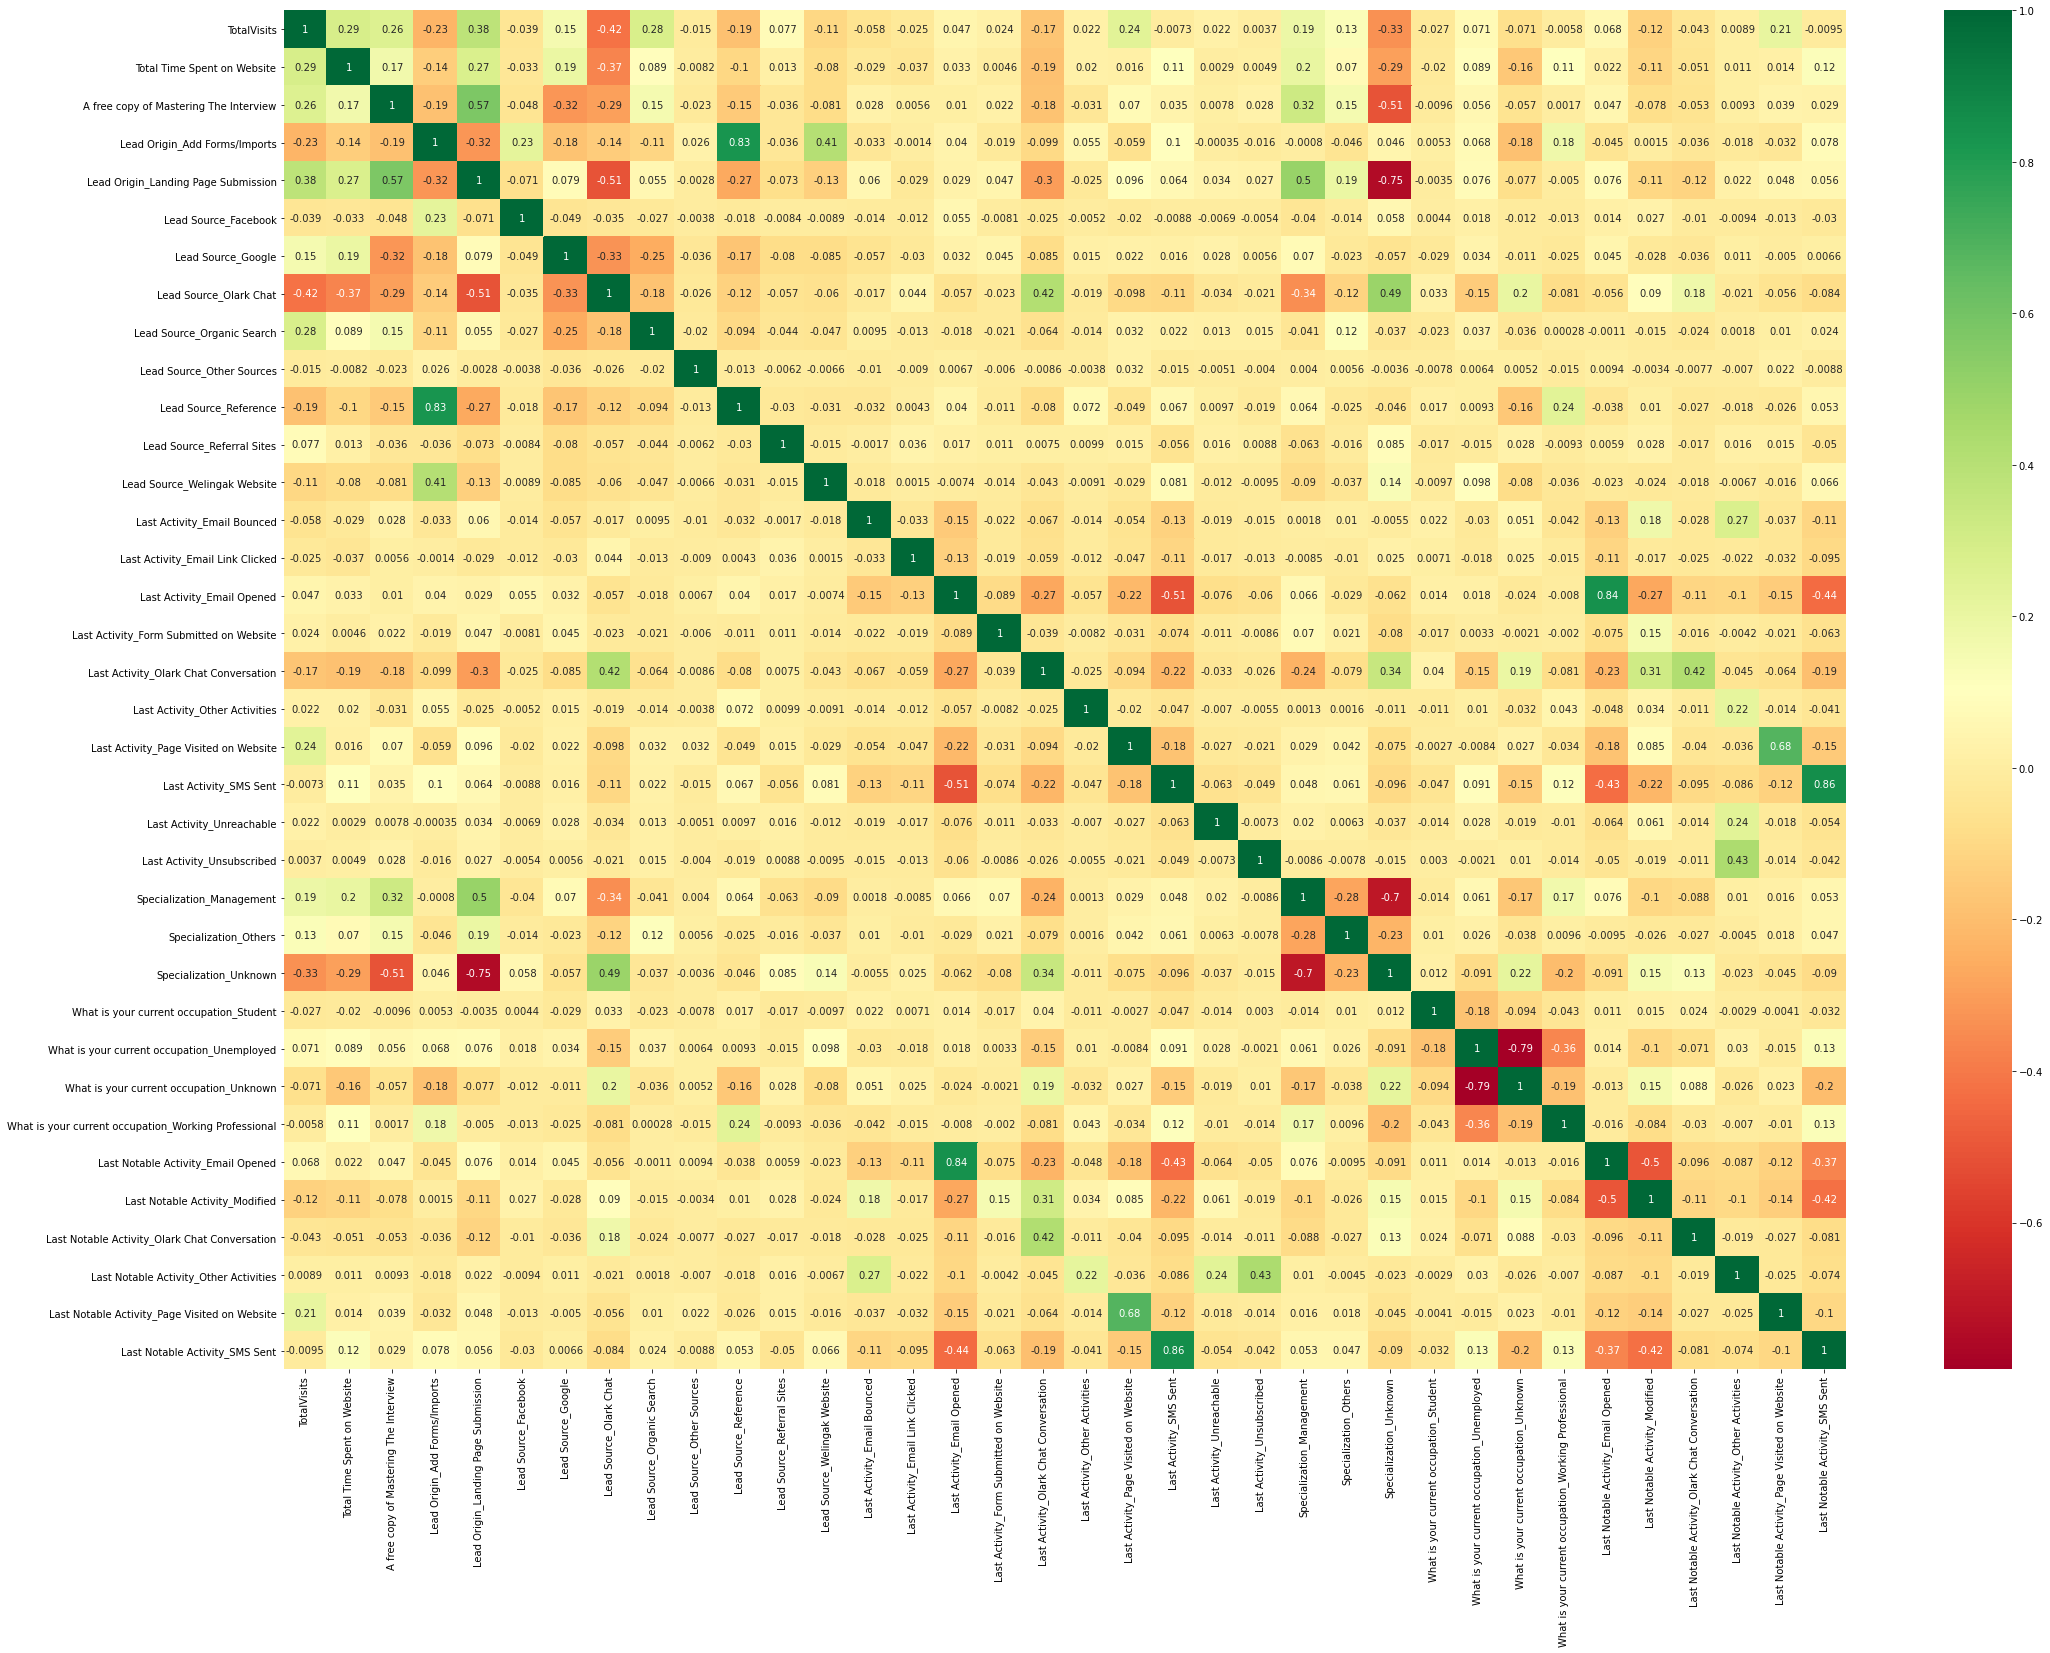

In [53]:
# Checking correlations between dependent columns

plt.figure(figsize=[35,25])
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn')

In [54]:
# Dropping columns that are highly correlated to each other ( value above 0.6)

X_train.drop(['Lead Source_Reference', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Page Visited on Website',
             'Specialization_Unknown', 'What is your current occupation_Unknown', 'Last Notable Activity_SMS Sent'] , axis=1, inplace=True)

X_test.drop(['Lead Source_Reference', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Page Visited on Website',
             'Specialization_Unknown', 'What is your current occupation_Unknown', 'Last Notable Activity_SMS Sent'] , axis=1, inplace=True)

<AxesSubplot:>

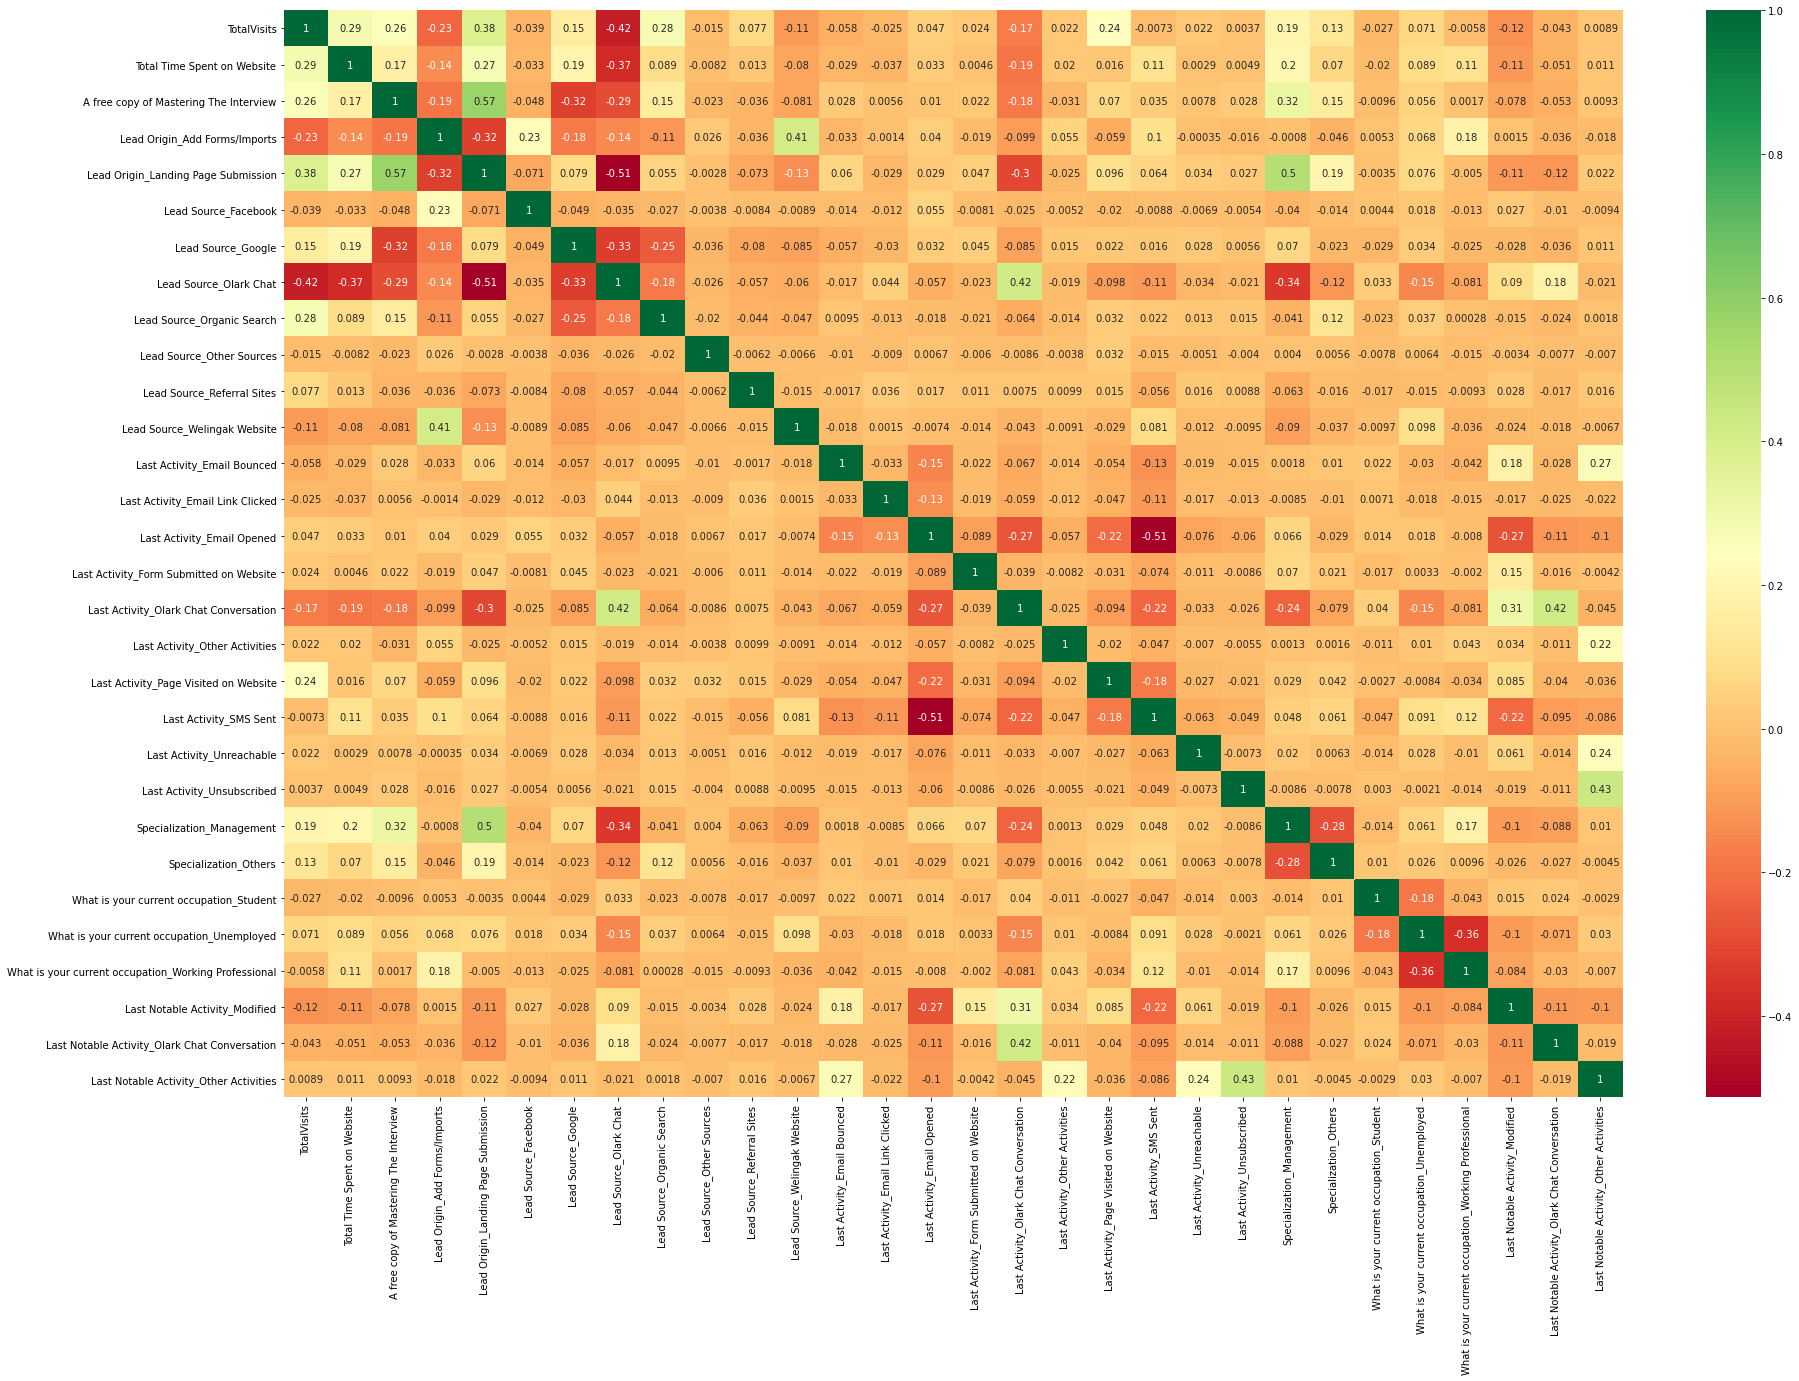

In [55]:
# Checking correlations between columns again

plt.figure(figsize=[30,20])
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn')

## 4. Model Building

In [56]:
# Building a Model with All features

lgm=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
lgm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.9
Date:                Wed, 14 Jul 2021   Deviance:                       5225.7
Time:                        00:28:53   Pearson chi2:                 6.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6492      0.269    -13.541      0.000      -4.177      -3.121
TotalVisits                                              1.6835      0.504      3.339      0.001       0.695       2.672
Total Time Spent on Website                              4.5162      0.167     27.018      0.000       4.189       4.844
A free copy of Mastering The Interview                  -0.1849      0.107     -1.732      0.083      -0.394       0.024
Lead Origin_Add Forms/Imports                            3.1770      0.223     14.271      0.000       2.741       3.613
Lead Origin_Landing Page Submission                     -0.5783      0.119     -4.869      0.000      -0.811      -0.345
Lead Source_Facebook                                    -3.3108      0.537     -6.161      0.000      -4.364      -2.258
Lead Source_Google                                       0.1918      0.112      1.713      0.087      -0.028       0.411
Lead Source_Olark Chat                                   1.2390      0.158      7.840      0.000       0.929       1.549
Lead Source_Organic Search                               0.0837      0.126      0.666      0.505      -0.162       0.330
Lead Source_Other Sources                                0.4230      0.661      0.640      0.522      -0.873       1.719
Lead Source_Referral Sites                               0.0274      0.326      0.084      0.933      -0.612       0.666
Lead Source_Welingak Website                             2.8307      1.025      2.763      0.006       0.823       4.839
Last Activity_Email Bounced                             -1.7899      0.439     -4.079      0.000      -2.650      -0.930
Last Activity_Email Link Clicked                         0.3159      0.302      1.046      0.296      -0.276       0.908
Last Activity_Email Opened                               0.6187      0.229      2.696      0.007       0.169       1.068
Last Activity_Form Submitted on Website                  0.3464      0.390      0.889      0.374      -0.417       1.110
Last Activity_Olark Chat Conversation                   -0.3440      0.276     -1.247      0.213      -0.885       0.197
Last Activity_Other Activities                           0.9803      0.577      1.699      0.089      -0.151       2.111
Last Activity_Page Visited on Website                    0.2274      0.259      0.879      0.379      -0.280       0.734
Last Activity_SMS Sent                                   1.6571      0.229      7.230      0.000       1.208       2.106
Last Activity_Unreachable                                0.5210      0.448      1.162      0.245      -0.358       1.400
Last Activity_Unsubscribed                              -0

**`OBSERVATIONS:`**
- From the above GLM data, we can see that there are many features with insignificant p-values.So, proceeding to do feature selection using RFE.

### 4.1 Feature selection using RFE

In [57]:
logreg = LogisticRegression()
rfem = RFE(logreg,15)
rfem = rfem.fit(X_train,y_train)

In [58]:
list(zip(X_train.columns, rfem.support_, rfem.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_Add Forms/Imports', True, 1),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Other Sources', False, 10),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 8),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activities', False, 3),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 7),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Manag

In [59]:
col = X_train.columns[rfem.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Add Forms/Imports', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other Activities'],
      dtype='object')

### 4.2 Model Building with RFE selected Features

In [60]:
# Model 1

X_train_1 = sm.add_constant(X_train[col])

## creating 1st RFE model
lgm1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=lgm1.fit()
print(reg1.summary())

## checking for VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.4
Date:                Wed, 14 Jul 2021   Deviance:                       5310.9
Time:                        00:28:54   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
11,What is your current occupation_Unemployed,2.50
1,Total Time Spent on Website,2.04
0,TotalVisits,2.02
13,Last Notable Activity_Modified,1.70
2,Lead Origin_Add Forms/Imports,1.63
7,Last Activity_Olark Chat Conversation,1.56
4,Lead Source_Olark Chat,1.55
8,Last Activity_SMS Sent,1.52
14,Last Notable Activity_Other Activities,1.43
12,What is your current occupation_Working Profes...,1.35


In [61]:
#Dropping What is your current occupation_Unemployed column since since VIF is very high (greater than 2)

col = col.drop('What is your current occupation_Unemployed', 1)

In [62]:
## Model 2

X_train_2=sm.add_constant(X_train[col])
lgm2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())
reg2=lgm2.fit()
print(reg2.summary())

## Checking for VIF's
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6448
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14146
Method:                          IRLS   Log-Likelihood:                -2843.0
Date:                Wed, 14 Jul 2021   Deviance:                       912.10
Time:                        00:28:54   Pearson chi2:                     912.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
1,Total Time Spent on Website,1.85
0,TotalVisits,1.76
12,Last Notable Activity_Modified,1.67
7,Last Activity_Olark Chat Conversation,1.56
2,Lead Origin_Add Forms/Imports,1.51
4,Lead Source_Olark Chat,1.45
8,Last Activity_SMS Sent,1.43
13,Last Notable Activity_Other Activities,1.43
9,Last Activity_Unsubscribed,1.28
5,Lead Source_Welingak Website,1.26


In [63]:
#Dropping Last Activity_Unsubscribed column since p-value is very high (close to 0.05)

col = col.drop('Last Activity_Unsubscribed', 1)

In [64]:
## Model 3

X_train_3=sm.add_constant(X_train[col])
lgm3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())
reg3=lgm3.fit()
print(reg3.summary())

## Checking for VIF's
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14152
Method:                          IRLS   Log-Likelihood:                -2845.0
Date:                Wed, 14 Jul 2021   Deviance:                       912.67
Time:                        00:28:54   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
1,Total Time Spent on Website,1.85
0,TotalVisits,1.76
11,Last Notable Activity_Modified,1.66
7,Last Activity_Olark Chat Conversation,1.56
2,Lead Origin_Add Forms/Imports,1.51
4,Lead Source_Olark Chat,1.45
8,Last Activity_SMS Sent,1.43
5,Lead Source_Welingak Website,1.26
6,Last Activity_Email Bounced,1.21
10,What is your current occupation_Working Profes...,1.18


In [65]:
#Dropping Last Notable Activity_Other Activities column since p-value is very high (greater than 0.05)

col = col.drop('Last Notable Activity_Other Activities', 1)

In [66]:
## Model 4

X_train_4=sm.add_constant(X_train[col])
lgm4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())
reg4=lgm4.fit()
print(reg4.summary())

## Checking for VIF's
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.14157
Method:                          IRLS   Log-Likelihood:                -2846.7
Date:                Wed, 14 Jul 2021   Deviance:                       913.16
Time:                        00:28:54   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
1,Total Time Spent on Website,1.84
0,TotalVisits,1.75
11,Last Notable Activity_Modified,1.63
7,Last Activity_Olark Chat Conversation,1.56
2,Lead Origin_Add Forms/Imports,1.51
4,Lead Source_Olark Chat,1.44
8,Last Activity_SMS Sent,1.42
5,Lead Source_Welingak Website,1.26
10,What is your current occupation_Working Profes...,1.18
6,Last Activity_Email Bounced,1.10


In [67]:
#Dropping What is your current occupation_Student column since it's coefficient is very small, implying it explains 
# only 0.09% of the target column Converted

col = col.drop('What is your current occupation_Student', 1)

In [68]:
## Model 5

X_train_5=sm.add_constant(X_train[col])
lgm5=sm.GLM(y_train,X_train_5,families=sm.families.Binomial())
reg5=lgm5.fit()
print(reg5.summary())

## Checking for VIF's
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.14176
Method:                          IRLS   Log-Likelihood:                -2851.4
Date:                Wed, 14 Jul 2021   Deviance:                       914.46
Time:                        00:28:54   Pearson chi2:                     914.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
1,Total Time Spent on Website,1.84
0,TotalVisits,1.74
10,Last Notable Activity_Modified,1.63
7,Last Activity_Olark Chat Conversation,1.56
2,Lead Origin_Add Forms/Imports,1.51
4,Lead Source_Olark Chat,1.44
8,Last Activity_SMS Sent,1.42
5,Lead Source_Welingak Website,1.26
9,What is your current occupation_Working Profes...,1.17
6,Last Activity_Email Bounced,1.10


#### As the P-values and VIF values are all good.. Finalizing the model

### 4.3 Prediction on Trained Dataset

In [69]:
y_train_pred = reg5.predict(X_train_5)

## create a new data set to save the predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred, 'Lead Score':round(y_train_pred*100)})
y_train_pred_final.head()

,Converted,Converted_probability,Lead Score
1032,1,0.80,80.00
6535,0,0.27,27.00
6238,1,0.66,66.00
3190,1,0.86,86.00
712,0,0.03,3.00


## 5. Model Evaluation

### 5.1 ROC Curve

In [70]:
## define a function for plotting roc curve along with auc score

def lead_roc( real, probability ):
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   # defining fpr,tpr and thresholds
    auc_score = roc_auc_score( real, probability )    # for calculation of area under curve
    plt.figure(figsize=(8, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'r--')     # for drawing diagnol 45 degree line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

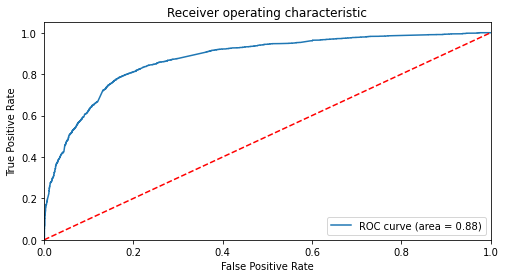

In [71]:
## Plotting ROC curve now..
lead_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

#### Can clearly observe that AUC is 88% which is a pretty good figure and curve is mostly towards top-left... so we can assume accuracy to be high as well..

### 5.2 Finding optimal probability cutoff point

In [72]:
## Let's create 20 points for choosing cut-off point

numbers=[float(x)/50 for x in range(50)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Lead Score,0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98
1032,1,0.80,80.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
6535,0,0.27,27.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6238,1,0.66,66.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3190,1,0.86,86.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
712,0,0.03,3.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
#Finding accuracy, sensitivity, specifity for all points to arrive at optimal value

df_cutoff = pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])
for i in numbers:
    con_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])
    total=sum(sum(con_matrix))
    accuracy=(con_matrix[0,0]+con_matrix[1,1])/total
    sensitivity=con_matrix[1,1]/(con_matrix[1,0]+con_matrix[1,1])
    specificity=con_matrix[0,0]/(con_matrix[0,0]+con_matrix[0,1])
    df_cutoff.loc[i]=[i, accuracy, sensitivity, specificity]
print(df_cutoff)

      Probability  Accuracy  Sensitvity  Specificity
0.00         0.00      0.42        0.99         0.07
0.02         0.02      0.44        0.99         0.10
0.04         0.04      0.46        0.99         0.13
0.06         0.06      0.53        0.98         0.24
0.08         0.08      0.54        0.98         0.27
0.10         0.10      0.55        0.98         0.28
0.12         0.12      0.57        0.97         0.32
0.14         0.14      0.60        0.97         0.36
0.16         0.16      0.63        0.95         0.43
0.18         0.18      0.67        0.95         0.49
0.20         0.20      0.68        0.94         0.53
0.22         0.22      0.70        0.93         0.56
0.24         0.24      0.72        0.92         0.60
0.26         0.26      0.74        0.91         0.62
0.28         0.28      0.77        0.88         0.70
0.30         0.30      0.78        0.87         0.72
0.32         0.32      0.79        0.86         0.74
0.34         0.34      0.79        0.84       

**`OBSERVATIONS:`**
- From the above generated values, we can see that probabilities ranging from 0.32 to 0.40 can be preferred
as the optimal cut-off value based on business requirement. 
- Here choosing 0.38 as optimal cut-off value, as sensitivity should be around 80% for our business case requirement.

**`Training Model Metrics`:**
- Accuracy: 81%  <br>
- Sensitivity: 81%  <br>
- Specificity: 81%

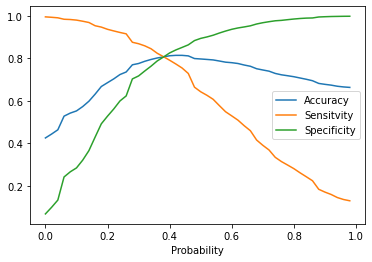

In [74]:
## Plotting the 3 metrics
df_cutoff.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

**`OBSERVATIONS:`**
- From the graph we can clearly choose around 0.4 as optimal probability cut-off

In [89]:
## Predicting with obtained optimal cut-off value

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.38 else 0 )
y_train_pred_final[['Converted', 'Converted_probability','Lead Score', 'Predicted']].head()

,Converted,Converted_probability,Lead Score,Predicted
1032,1,0.80,80.00,1
6535,0,0.27,27.00,0
6238,1,0.66,66.00,1
3190,1,0.86,86.00,1
712,0,0.03,3.00,0


### 5.3 Precision and Recall

In [76]:
## Creating a confusion matrix for finding precision and recall
con_mat=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
con_mat

array([[3199,  772],
       [ 480, 2012]], dtype=int64)

In [77]:
#Confusion matrix values

TP = con_mat[1,1] # true positive 
TN = con_mat[0,0] # true negatives
FP = con_mat[0,1] # false positives
FN = con_mat[1,0] # false negatives

In [78]:
## Precision
print('Precision is',round((TP/(TP+FP))*100,2))

## Recall
print('Recall is',round((TP/(TP+FN))*100,2))

## F1 - Score
print("F1-Score is",round((metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100),2))

#Accuracy
print('Accuracy is', round((float(TP + TN) / float(TP+TN+FP+FN))*100,2))

# Sensitivity
print('Sensitivity is', round((TP / float(TP+FN))*100,2))

# Specificity
print('Specificity is', round((TN / float(TN+FP))*100,2))


# False postive rate
print('False Positive Rate is', round((FP/ float(TN+FP))*100,2))

# Negative predictive value
print('Negative Predictive Rate is', round((TN / float(TN+ FN))*100,2))



Precision is 72.27
Recall is 80.74
F1-Score is 76.27
Accuracy is 80.63
Sensitivity is 80.74
Specificity is 80.56
False Positive Rate is 19.44
Negative Predictive Rate is 86.95


#### Precision: 72% 
#### Recall: 81% 


**`Observations:`**
- The model built explains around 72% of relevancy to the total data points, i.e, 72% of data are correctly predicted positives to total predicted positives
- The model built explains 81% of relevancy to the relevant data points, i.e, 81% of data are correctly predicted positives to total actual positives.
- This model is built with keeping in mind that the Sensitivity/ Recall must be high, i.e., around 80%

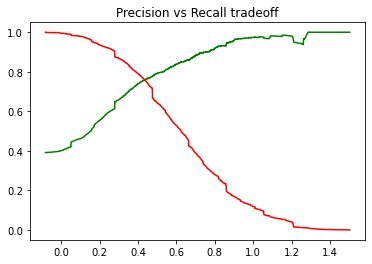

In [79]:
## Plotting the P-R curve
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### we can clearly see that Precision Vs Recall trade-off is around 0.4

## 6. Predictions on Test Dataset

In [80]:
## Scaling of variables
X_test[['TotalVisits','Total Time Spent on Website']] = scalar.transform(X_test[['TotalVisits','Total Time Spent on Website']])

In [81]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Add Forms/Imports,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified
4869,0.05,0.58,0,0,0,0,0,0,0,1,0
8687,0.12,0.64,0,0,0,0,0,0,1,0,0
3719,0.05,0.06,0,0,0,0,0,0,1,0,0
3511,0.19,0.45,0,0,0,0,0,0,0,0,0
2508,0.12,0.05,0,0,0,0,0,0,1,0,0


In [82]:
## Prediction using our final model

X_test_sm = sm.add_constant(X_test)

y_test_pred = reg5.predict(X_test_sm)

## creating a new data set to store predicted values same like in train data

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_test_pred,'Lead Score':(y_test_pred*100).round()})
y_test_pred_final.head()

,Converted,Converted_Probability,Lead Score
4869,1,0.91,91.00
8687,1,0.81,81.00
3719,0,0.35,35.00
3511,1,0.48,48.00
2508,1,0.35,35.00


## 7. Model Evaluation on Test Dataset

In [83]:
## Finding the predicted outcomes with the cut-off that we obtained
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.38 else 0 )
y_test_pred_final.head()

,Converted,Converted_Probability,Lead Score,Predicted
4869,1,0.91,91.00,1
8687,1,0.81,81.00,1
3719,0,0.35,35.00,0
3511,1,0.48,48.00,1
2508,1,0.35,35.00,0


In [84]:
# Evaluating Model performance on test dataset

## Accuracy
print('Accuracy is',round((metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))*100,2))

## Precision
print('Precision score is:', round((precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))*100,2))

## Recall
print('Recall score is:',round((recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))*100,2))

## F1 - Score
print("F1-Score is",round((metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100),2))

#Confusion Matrix
con_matrix=confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
TP = con_mat[1,1] # true positive 
TN = con_mat[0,0] # true negatives
FP = con_mat[0,1] # false positives
FN = con_mat[1,0] # false negatives

# Sensitivity
print('Sensitivity is', round((TP / float(TP+FN))*100,2))

# Specificity
print('Specificity is', round((TN / float(TN+FP))*100,2))


# False postive rate
print('False Positive Rate is', round((FP/ float(TN+FP))*100,2))

# Negative predictive value
print('Negative Predictive Rate is', round((TN / float(TN+ FN))*100,2))

Accuracy is 81.26
Precision score is: 73.62
Recall score is: 80.04
F1-Score is 76.27
Sensitivity is 80.74
Specificity is 80.56
False Positive Rate is 19.44
Negative Predictive Rate is 86.95


In [85]:
y_test_pred_final['Lead Number'] = df.loc[y_test_pred_final.index,'Lead Number']

In [86]:
y_test_pred_final.head()

,Converted,Converted_Probability,Lead Score,Predicted,Lead Number
4869,1,0.91,91.00,1,613343
8687,1,0.81,81.00,1,583526
3719,0,0.35,35.00,0,624449
3511,1,0.48,48.00,1,626890
2508,1,0.35,35.00,0,635686


## SUMMARY

#### Final Model Parameters on Train Dataset:

Precision is 72% <br>
Recall is 81% <br>
F1-Score is 76% <br>
Accuracy is 81% <br>
Sensitivity is 81% <br>
Specificity is 81% <br>
False Positive Rate is 19% <br>
Negative Predictive Rate is 87% <br>
    
#### Final Model Parameters on Test Dataset:

Precision score is: 74% <br>
Recall score is: 80% <br>
F1-Score is 76% <br>
Accuracy is 81% <br>
Sensitivity is 81% <br>
Specificity is 81% <br>
False Positive Rate is 19% <br>
Negative Predictive Rate is 87% <br>

### The log odds linear equation:

<br>

$ Converted = 0.0912 + 0.7937  \times  \text{Total Time Spent on Website} + 0.5727 \times \text{Lead Origin_Add Forms/Imports} + 0.3449 \times \text{What is your current occupation_Working Professional} + 0.1962 \times \text{Last Activity_SMS Sent} + 0.1947 \times \text{TotalVisits} +0.1945 \times \text{Lead Source_Welingak Website}  + 0.1875 \times \text{Lead Source_Olark Chat} - 0.5457 \times \text{Lead Source_Facebook} - 0.1296 \times \text{Last Activity_Email Bounced} - 0.1204 \times \text{Last Notable Activity_Modified} -0.1072 \times \text{Last Activity_Olark Chat Conversation} $

**`The features positively contributing to Conversion of Leads are:`**
- Total Time Spent on Website
- Lead Origin_Add Forms/Imports
- What is your current occupation_Working Professional
- Last Activity_SMS Sent
- TotalVisits
- Lead Source_Welingak Website
- Lead Source_Olark Chat

#### When leads spend more time on the website, or their origin is from Add forms/ imports, or the last activity is a SMS sent, or the source of the lead is Olark Chat/ Welingak Website , or their total visits to the website is high, they are more likely to get converted to customers of X Education.

**`The features inversely contributing to Conversion of Leads are:`**
- Lead Source_Facebook
- Last Activity_Email Bounced
- Last Notable Activity_Modified
- Last Activity_Olark Chat Conversation


#### When lead source is from Facebook or leads' last activity is Email Bounced/ Olark Chat Conversation or the last notable activity is modified, then there are less likely chances that they would get converted to customers of X Education.